In [1]:
import os
import torch
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.cuda.amp import GradScaler

# Import utils
from utils.Logger import Logger
from utils.Seed import set_seed
from utils.Splitter import stratified_split
from classes.FeatureDataset.CombinedFeatureDataset import CombinedFeatureDataset
from classes.FeatureDataset.WaveformFeatureDataset import WaveformFeatureDataset
from classes.FeatureDataset.ListDataset import ListDataset

# Import RawNet1 components
from classes.models.RawNets.RawNet1.model_RawNet1_preprocessed import RawNet
from classes.models.RawNets.RawNet1.trainer_RawNet1 import test_rawnet1, load_model_rawnet1, test_rawnet1_with_loaders

# Import RawNet2 components
from classes.models.RawNets.RawNet2.model_RawNet2_preprocessed import RawNet2
from classes.models.RawNets.RawNet2.trainer_RawNet2 import test_rawnet2, load_model_rawnet2, test_rawnet2_with_loaders

# Import RawNet3 components
from classes.models.RawNets.RawNet3.model_RawNet3_preprocessed import RawNet3
from classes.models.RawNets.RawNet3.trainer_RawNet3 import test_rawnet3, load_model_rawnet3, test_rawnet3_with_loaders

seed = 42
set_seed(42)

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = ""

device = "cuda" if torch.cuda.is_available() else "cpu"

batch_size = 32
learning_rate = 0.0001
epochs = 5

# Combined

In [2]:
# samples will be stored here:
combined_test_samples = {
    "spoof elevenmultilingualv2 converted samples": [],
    "spoof elevenmultilingualv2 tts samples": [],
    "spoof dupdub tts samples": [],
    "spoof dupdub notindataset tts samples": [],
    "spoof facebookmms converted samples": [],
    "spoof facebookmms tts samples": [],
    "spoof googletts converted samples": [],
    "spoof googletts tts samples": [],
    "spoof vits converted samples": [],
    "spoof vits tts samples": [],
    "bonafide commonvoice samples": [],
    "bonafide prosa samples": [],

    "spoof all samples": [],
    "bonafide all samples": []
}

# unseen spoof datasets
combined_spoof_elevenmultilingualv2_converted_dir = "test_preprocessed_data/combined/Spoof/Converted/ElevenMultilingualV2"
combined_spoof_elevenmultilingualv2_tts_dir = "test_preprocessed_data/combined/Spoof/TTS/ElevenMultilingualV2"
combined_spoof_dupdub_tts_dir = "test_preprocessed_data/combined/Spoof/TTS/DupDub"
combined_spoof_dupdub_notindataset_tts_dir = "test_preprocessed_data/combined/Spoof/TTS/DupDub-NotInDataset"

# seen spoof datasets
combined_spoof_facebookmms_converted_dir = "preprocessed_data/combined/Spoof/Converted/FacebookMMS"
combined_spoof_facebookmms_tts_dir = "preprocessed_data/combined/Spoof/TTS/FacebookMMS"
combined_spoof_googletts_converted_dir = "preprocessed_data/combined/Spoof/Converted/GoogleTTS"
combined_spoof_googletts_tts_dir = "preprocessed_data/combined/Spoof/TTS/GoogleTTS"
combined_spoof_vits_converted_dir = "preprocessed_data/combined/Spoof/Converted/VITS"
combined_spoof_vits_tts_dir = "preprocessed_data/combined/Spoof/TTS/VITS"

# Bonafide datasets (split each, DataLoader per split, do not combine)
combined_bonafide_commonvoice_dir = "preprocessed_data/combined/Bonafide/CommonVoice"
combined_bonafide_prosa_dir = "preprocessed_data/combined/Bonafide/Prosa"

# ElevenMultilingualV2 Converted
if os.path.exists(combined_spoof_elevenmultilingualv2_converted_dir):
    combined_spoof_elevenmultilingualv2_converted_dataset = CombinedFeatureDataset(combined_spoof_elevenmultilingualv2_converted_dir, force_label=0)
    combined_spoof_elevenmultilingualv2_converted_list = ListDataset([(features, 0) for features, _ in combined_spoof_elevenmultilingualv2_converted_dataset.samples])
    combined_test_samples["spoof elevenmultilingualv2 converted samples"].extend(combined_spoof_elevenmultilingualv2_converted_list)
    combined_test_samples["spoof all samples"].extend(combined_spoof_elevenmultilingualv2_converted_list)

    print(f"Loaded {len(combined_spoof_elevenmultilingualv2_converted_list)} samples from {combined_spoof_elevenmultilingualv2_converted_dir}")
else:
    print(f"Warning: Directory not found: {combined_spoof_elevenmultilingualv2_converted_dir}")

# ElevenMultilingualV2 TTS
if os.path.exists(combined_spoof_elevenmultilingualv2_tts_dir):
    combined_spoof_elevenmultilingualv2_tts_dataset = CombinedFeatureDataset(combined_spoof_elevenmultilingualv2_tts_dir, force_label=0)
    combined_spoof_elevenmultilingualv2_tts_list = ListDataset([(features, 0) for features, _ in combined_spoof_elevenmultilingualv2_tts_dataset.samples])
    combined_test_samples["spoof elevenmultilingualv2 tts samples"].extend(combined_spoof_elevenmultilingualv2_tts_list)
    combined_test_samples["spoof all samples"].extend(combined_spoof_elevenmultilingualv2_tts_list)

    print(f"Loaded {len(combined_spoof_elevenmultilingualv2_tts_list)} samples from {combined_spoof_elevenmultilingualv2_tts_dir}")
else:
    print(f"Warning: Directory not found: {combined_spoof_elevenmultilingualv2_tts_dir}")

# DupDub TTS
if os.path.exists(combined_spoof_dupdub_tts_dir):
    combined_spoof_dupdub_tts_dataset = CombinedFeatureDataset(combined_spoof_dupdub_tts_dir, force_label=0)
    combined_spoof_dupdub_tts_list = ListDataset([(features, 0) for features, _ in combined_spoof_dupdub_tts_dataset.samples])
    combined_test_samples["spoof dupdub tts samples"].extend(combined_spoof_dupdub_tts_list)
    combined_test_samples["spoof all samples"].extend(combined_spoof_dupdub_tts_list)

    print(f"Loaded {len(combined_spoof_dupdub_tts_list)} samples from {combined_spoof_dupdub_tts_dir}")
else:
    print(f"Warning: Directory not found: {combined_spoof_dupdub_tts_dir}")

# FacebookMMS Converted
if os.path.exists(combined_spoof_facebookmms_converted_dir):
    dataset_combined_spoof_facebookmms_converted = CombinedFeatureDataset(combined_spoof_facebookmms_converted_dir, force_label=0)
    combined_spoof_facebookmms_converted = ListDataset([(features, 0) for features, _ in dataset_combined_spoof_facebookmms_converted.samples])
    t_fmc, v_fmc, te_fmc = stratified_split(combined_spoof_facebookmms_converted, splits=(0.7, 0.15, 0.15), seed=seed)

    combined_spoof_facebookmms_converted_list = ListDataset([combined_spoof_facebookmms_converted[i] for i in range(len(te_fmc))])
    combined_test_samples["spoof facebookmms converted samples"].extend(combined_spoof_facebookmms_converted_list)
    combined_test_samples["spoof all samples"].extend(combined_spoof_facebookmms_converted_list)

    print(f"Loaded {len(combined_spoof_facebookmms_converted_list)} samples from {combined_spoof_facebookmms_converted_dir}")
else:
    print(f"Warning: Directory not found: {combined_spoof_facebookmms_converted_dir}")

# FacebookMMS TTS
if os.path.exists(combined_spoof_facebookmms_tts_dir):
    dataset_combined_spoof_facebookmms_tts = CombinedFeatureDataset(combined_spoof_facebookmms_tts_dir, force_label=0)
    combined_spoof_facebookmms_tts = ListDataset([(features, 0) for features, _ in dataset_combined_spoof_facebookmms_tts.samples])
    t_fmt, v_fmt, te_fmt = stratified_split(combined_spoof_facebookmms_tts, splits=(0.7, 0.15, 0.15), seed=seed)
    
    combined_spoof_facebookmms_tts_list = ListDataset([combined_spoof_facebookmms_tts[i] for i in range(len(te_fmt))])
    combined_test_samples["spoof facebookmms tts samples"].extend(combined_spoof_facebookmms_tts_list)
    combined_test_samples["spoof all samples"].extend(combined_spoof_facebookmms_tts_list)

    print(f"Loaded {len(combined_spoof_facebookmms_tts_list)} samples from {combined_spoof_facebookmms_tts_dir}")
else:
    print(f"Warning: Directory not found: {combined_spoof_facebookmms_tts_dir}")

# GoogleTTS Converted
if os.path.exists(combined_spoof_googletts_converted_dir):
    dataset_combined_spoof_googletts_converted = CombinedFeatureDataset(combined_spoof_googletts_converted_dir, force_label=0)
    combined_spoof_googletts_converted = ListDataset([(features, 0) for features, _ in dataset_combined_spoof_googletts_converted.samples])
    t_gtc, v_gtc, te_gtc = stratified_split(combined_spoof_googletts_converted, splits=(0.7, 0.15, 0.15), seed=seed)

    combined_spoof_googletts_converted_list = ListDataset([combined_spoof_googletts_converted[i] for i in range(len(te_gtc))])
    combined_test_samples["spoof googletts converted samples"].extend(combined_spoof_googletts_converted_list)
    combined_test_samples["spoof all samples"].extend(combined_spoof_googletts_converted_list)

    print(f"Loaded {len(combined_spoof_googletts_converted_list)} samples from {combined_spoof_googletts_converted_dir}")
else:
    print(f"Warning: Directory not found: {combined_spoof_googletts_converted_dir}")

# GoogleTTS TTS
if os.path.exists(combined_spoof_googletts_tts_dir):
    dataset_combined_spoof_googletts_tts = CombinedFeatureDataset(combined_spoof_googletts_tts_dir, force_label=0)
    combined_spoof_googletts_tts = ListDataset([(features, 0) for features, _ in dataset_combined_spoof_googletts_tts.samples])
    t_gtt, v_gtt, te_gtt = stratified_split(combined_spoof_googletts_tts, splits=(0.7, 0.15, 0.15), seed=seed)

    combined_spoof_googletts_tts_list = ListDataset([combined_spoof_googletts_tts[i] for i in range(len(te_gtt))])
    combined_test_samples["spoof googletts tts samples"].extend(combined_spoof_googletts_tts_list)
    combined_test_samples["spoof all samples"].extend(combined_spoof_googletts_tts_list)

    print(f"Loaded {len(combined_spoof_googletts_tts_list)} samples from {combined_spoof_googletts_tts_dir}")
else:
    print(f"Warning: Directory not found: {combined_spoof_googletts_tts_dir}")

# VITS Converted
if os.path.exists(combined_spoof_vits_converted_dir):
    dataset_combined_spoof_vits_converted = CombinedFeatureDataset(combined_spoof_vits_converted_dir, force_label=0)
    combined_spoof_vits_converted = ListDataset([(features, 0) for features, _ in dataset_combined_spoof_vits_converted.samples])
    t_vc, v_vc, te_vc = stratified_split(combined_spoof_vits_converted, splits=(0.7, 0.15, 0.15), seed=seed)

    combined_spoof_vits_converted_list = ListDataset([combined_spoof_vits_converted[i] for i in range(len(te_vc))])
    combined_test_samples["spoof vits converted samples"].extend(combined_spoof_vits_converted_list)
    combined_test_samples["spoof all samples"].extend(combined_spoof_vits_converted_list)

    print(f"Loaded {len(combined_spoof_vits_converted_list)} samples from {combined_spoof_vits_converted_dir}")
else:
    print(f"Warning: Directory not found: {combined_spoof_vits_converted_dir}")

# VITS TTS
if os.path.exists(combined_spoof_vits_tts_dir):
    dataset_combined_spoof_vits_tts = CombinedFeatureDataset(combined_spoof_vits_tts_dir, force_label=0)
    combined_spoof_vits_tts = ListDataset([(features, 0) for features, _ in dataset_combined_spoof_vits_tts.samples])
    t_vt, v_vt, te_vt = stratified_split(combined_spoof_vits_tts, splits=(0.7, 0.15, 0.15), seed=seed)

    combined_spoof_vits_tts_list = ListDataset([combined_spoof_vits_tts[i] for i in range(len(te_vt))])
    combined_test_samples["spoof vits tts samples"].extend(combined_spoof_vits_tts_list)
    combined_test_samples["spoof all samples"].extend(combined_spoof_vits_tts_list)

    print(f"Loaded {len(combined_spoof_vits_tts_list)} samples from {combined_spoof_vits_tts_dir}")
else:
    print(f"Warning: Directory not found: {combined_spoof_vits_tts_dir}")

# Bonafide CommonVoice
if os.path.exists(combined_bonafide_commonvoice_dir):
    dataset_commonvoice = CombinedFeatureDataset(combined_bonafide_commonvoice_dir, force_label=1)
    combined_bonafide_commonvoice = ListDataset([(features, 1) for features, _ in dataset_commonvoice.samples])
    t_c, v_c, te_c = stratified_split(combined_bonafide_commonvoice, splits=(0.7, 0.15, 0.15), seed=seed)

    combined_bonafide_commonvoice_list = ListDataset([combined_bonafide_commonvoice[i] for i in range(len(te_c))])
    combined_test_samples["bonafide commonvoice samples"].extend(combined_bonafide_commonvoice_list)
    combined_test_samples["bonafide all samples"].extend(combined_bonafide_commonvoice_list)

    print(f"Loaded {len(combined_bonafide_commonvoice_list)} samples from {combined_bonafide_commonvoice_dir}")
else:
    print(f"Warning: Directory not found: {combined_bonafide_commonvoice_dir}")

# Bonafide Prosa
if os.path.exists(combined_bonafide_prosa_dir):
    dataset_prosa = CombinedFeatureDataset(combined_bonafide_prosa_dir, force_label=1)
    combined_bonafide_prosa = ListDataset([(features, 1) for features, _ in dataset_prosa.samples])
    t_p, v_p, te_p = stratified_split(combined_bonafide_prosa, splits=(0.7, 0.15, 0.15), seed=seed)

    combined_bonafide_prosa_list = ListDataset([combined_bonafide_prosa[i] for i in range(len(te_p))])
    combined_test_samples["bonafide prosa samples"].extend(combined_bonafide_prosa_list)
    combined_test_samples["bonafide all samples"].extend(combined_bonafide_prosa_list)

    print(f"Loaded {len(combined_bonafide_prosa_list)} samples from {combined_bonafide_prosa_dir}")
else:
    print(f"Warning: Directory not found: {combined_bonafide_prosa_dir}")

print(f"Total test spoof samples: {len(combined_test_samples['spoof all samples'])}")
print(f"Total test bonafide samples: {len(combined_test_samples['bonafide all samples'])}")

combined_test_samples_dataloaders = {
    key: DataLoader(value, batch_size=batch_size, shuffle=False, num_workers=4)
    for key, value in combined_test_samples.items()
}

Skipped 0 files due to NaNs/Infs.
Loaded 746 samples from test_preprocessed_data/combined/Spoof/Converted/ElevenMultilingualV2
Skipped 0 files due to NaNs/Infs.
Loaded 751 samples from test_preprocessed_data/combined/Spoof/TTS/ElevenMultilingualV2
Skipped 0 files due to NaNs/Infs.
Loaded 101 samples from test_preprocessed_data/combined/Spoof/TTS/DupDub
Skipped 0 files due to NaNs/Infs.
Loaded 1249 samples from preprocessed_data/combined/Spoof/Converted/FacebookMMS
Skipped 0 files due to NaNs/Infs.
Loaded 2517 samples from preprocessed_data/combined/Spoof/TTS/FacebookMMS
Skipped 0 files due to NaNs/Infs.
Loaded 1225 samples from preprocessed_data/combined/Spoof/Converted/GoogleTTS
Skipped 0 files due to NaNs/Infs.
Loaded 0 samples from preprocessed_data/combined/Spoof/TTS/GoogleTTS
Skipped 0 files due to NaNs/Infs.
Loaded 925 samples from preprocessed_data/combined/Spoof/Converted/VITS
Skipped 0 files due to NaNs/Infs.
Loaded 1862 samples from preprocessed_data/combined/Spoof/TTS/VITS
S

## RawNet1

Loaded model from pretrained_weights\combined\RawNet1\rawnet1_combined-ep_100-bs_32-lr_0.0001.pth (epoch 99)


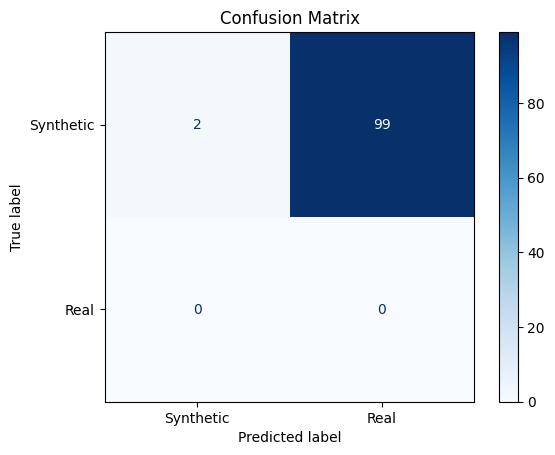

In [ ]:
combined_model_config = {
    'in_channels': 1,
    'first_conv': 3,
    'filts': [128, [128, 128], [128, 256], [256, 256]],
    'blocks': [2, 4],
    'gru_node': 1024,
    'nb_gru_layer': 1,
    'nb_fc_node': 1024,
    'nb_classes': 2
}

# --- Set up model, optimizer, and scaler ---
model = RawNet(combined_model_config, device).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
scaler = GradScaler()

# --- Load the model ---
start_epoch = load_model_rawnet1(
    model, optimizer, scaler,
    path=r"pretrained_weights\combined\RawNet1\rawnet1_combined-ep_30-bs_32-lr_0.0001.pth"
)

for key, test_sample in combined_test_samples_dataloaders.items():
    print(f"Testing {key}")
    predictions = test_rawnet1_with_loaders(model, test_sample, device=device)
    print(predictions)

## RawNet2

Loaded model from pretrained_weights\combined\RawNet2\rawnet2_combined-ep_100-bs_32-lr_0.0001.pth (epoch 99)


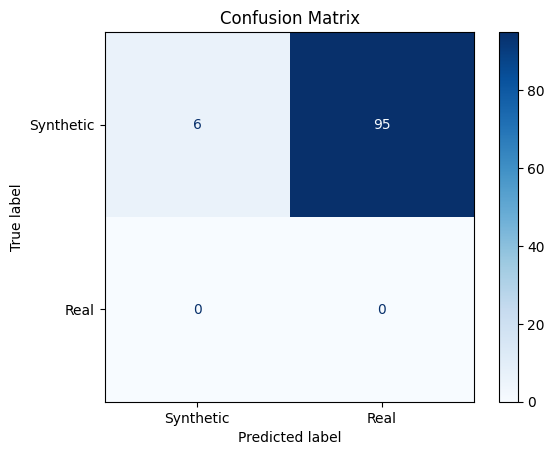

In [ ]:
combined_model_config2 = {
    'in_channels': 1,
    'first_conv': 3,
    'filts': [128, [128, 128], [128, 256], [256, 256]],
    'blocks': [2, 4],
    'gru_node': 1024,
    'nb_gru_layer': 1,
    'nb_fc_node': 1024,
    'nb_classes': 2,
    'nb_samp': 16000 * 4 + 24
}

device = "cuda" if torch.cuda.is_available() else "cpu"

# --- Set up model, optimizer, and scaler ---
model = RawNet2(combined_model_config2).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
scaler = GradScaler()

# --- Load the model ---
start_epoch = load_model_rawnet2(
    model, optimizer, scaler,
    path=r"pretrained_weights\combined\RawNet2\rawnet2_combined-ep_30-bs_32-lr_0.0001.pth"
)

for key, test_sample in combined_test_samples_dataloaders.items():
    print(f"Testing {key}")
    predictions = test_rawnet2_with_loaders(model, test_sample, device=device)
    print(predictions)

## RawNet3

Loaded model from pretrained_weights\combined\RawNet3\rawnet3_combined-ep_23-bs_32-lr_0.0001.pth (epoch 22)


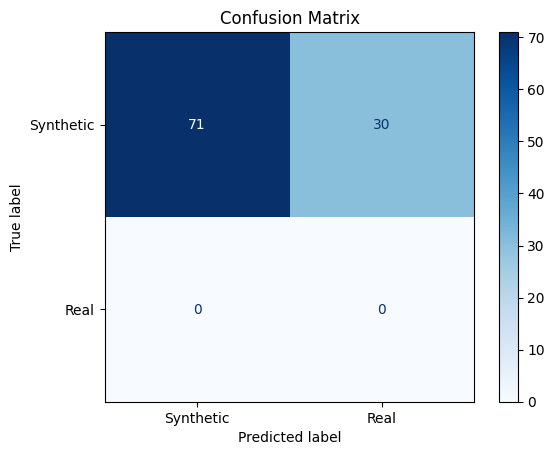

In [ ]:
combined_model_config3 = {
    "nOut": 2,
    "sinc_stride": 10,
    "encoder_type": "ECA",
    "log_sinc": True,
    "norm_sinc": "mean_std",
    "out_bn": True
}

# --- Set up model, optimizer, and scaler ---
model = RawNet3(**combined_model_config3).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
scaler = GradScaler()

# --- Load the model ---
start_epoch = load_model_rawnet3(
    model, optimizer, scaler,
    path=r"pretrained_weights\combined\RawNet3\rawnet3_combined-ep_23-bs_32-lr_0.0001.pth"
)

for key, test_sample in combined_test_samples_dataloaders.items():
    print(f"Testing {key}")
    predictions = test_rawnet3_with_loaders(model, test_sample, device=device)
    print(predictions)

# Combined (ver 2)

## RawNet1

Loaded model from pretrained_weights\diff_pipeline\RawNet1\rawnet1_diff_pipeline-ep_30-bs_32-lr_0.0001.pth (epoch 29)
Testing spoof elevenmultilingualv2 converted samples


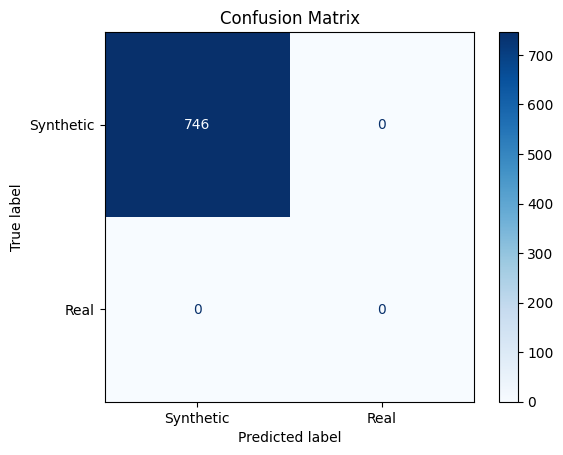

None
Testing spoof elevenmultilingualv2 tts samples


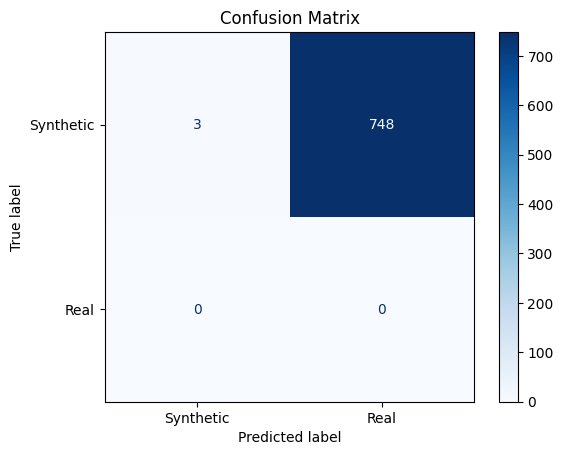

None
Testing spoof dupdub tts samples


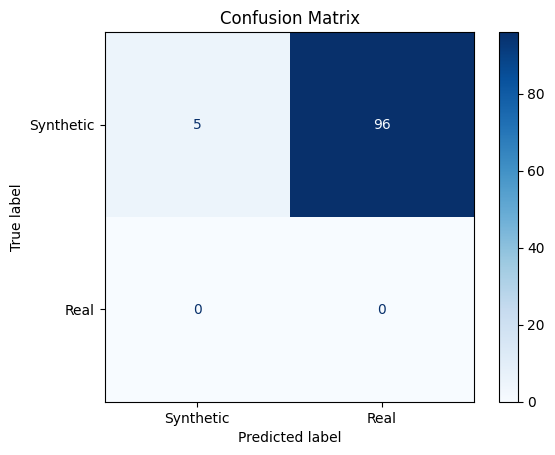

None
Testing spoof dupdub notindataset tts samples


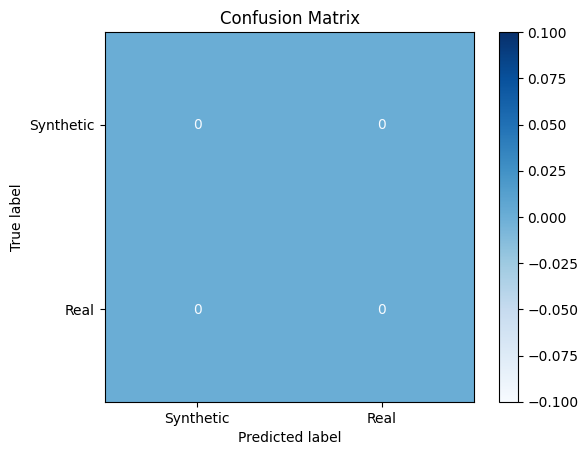

None
Testing spoof facebookmms converted samples


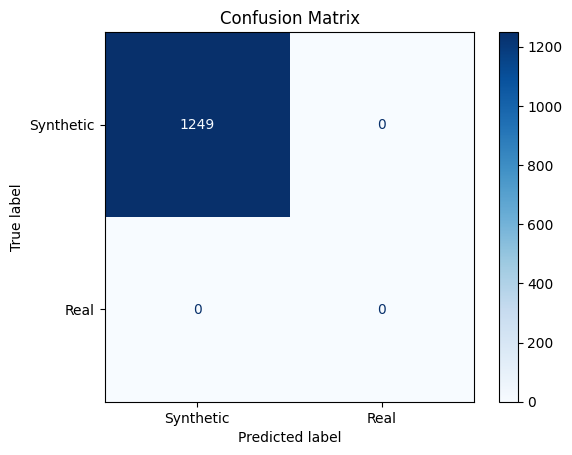

None
Testing spoof facebookmms tts samples


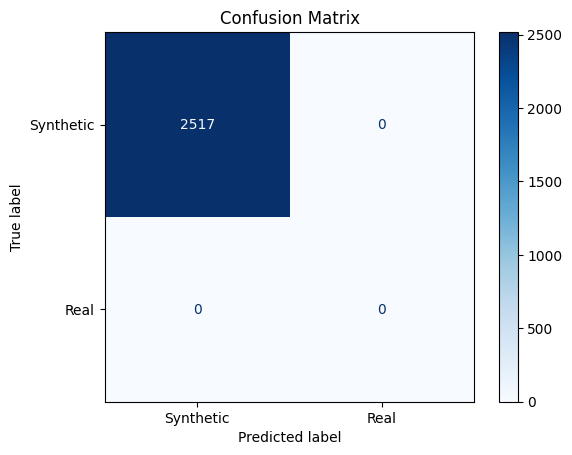

None
Testing spoof googletts converted samples


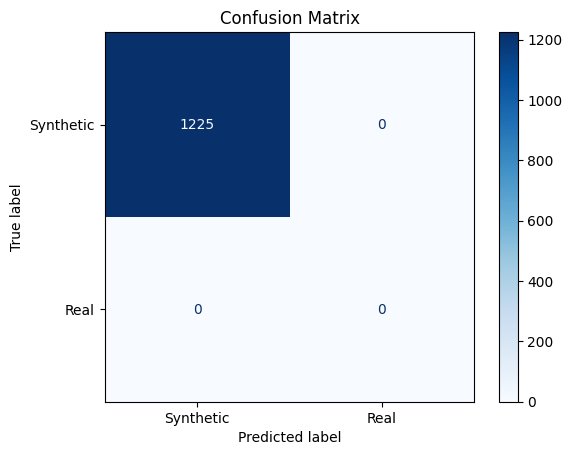

None
Testing spoof googletts tts samples


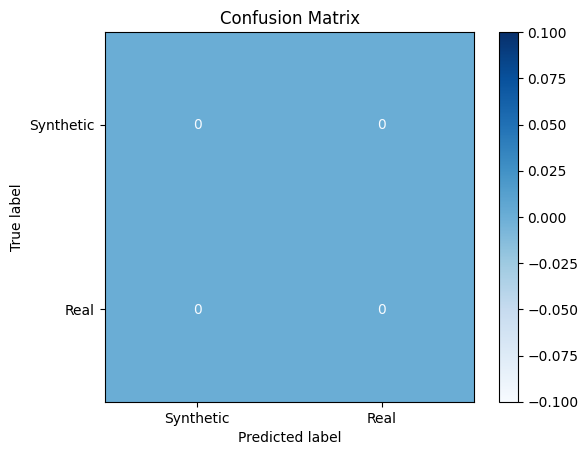

None
Testing spoof vits converted samples


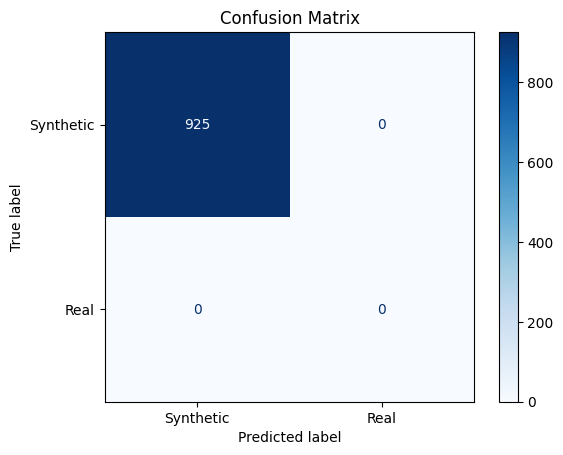

None
Testing spoof vits tts samples


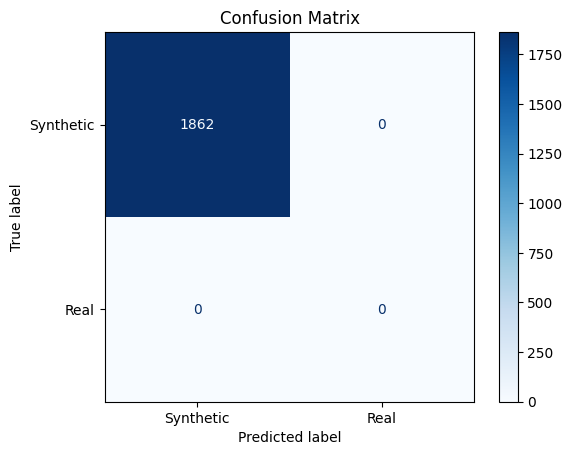

None
Testing bonafide commonvoice samples


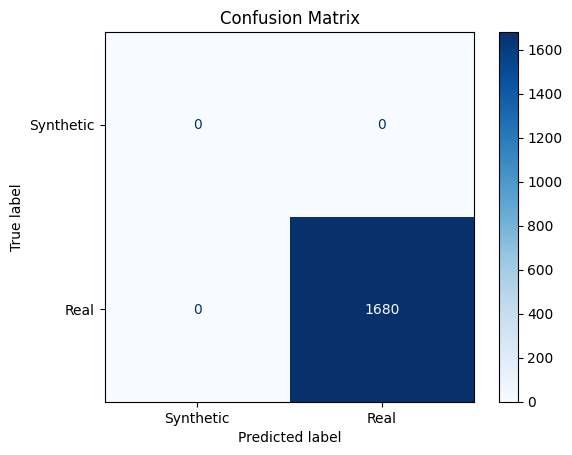

None
Testing bonafide prosa samples


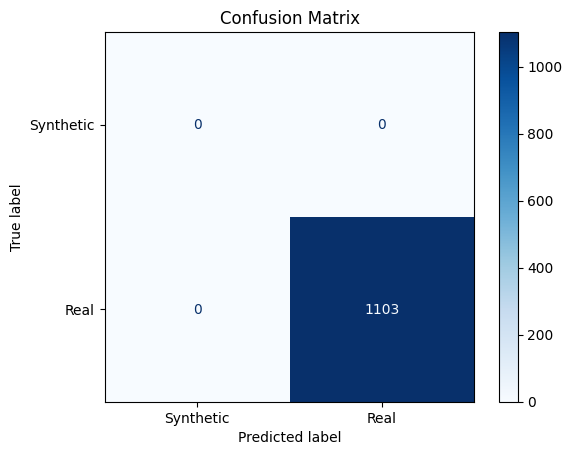

None
Testing spoof all samples


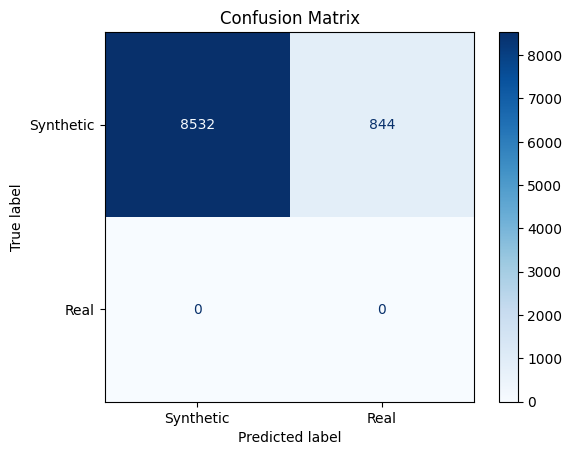

None
Testing bonafide all samples


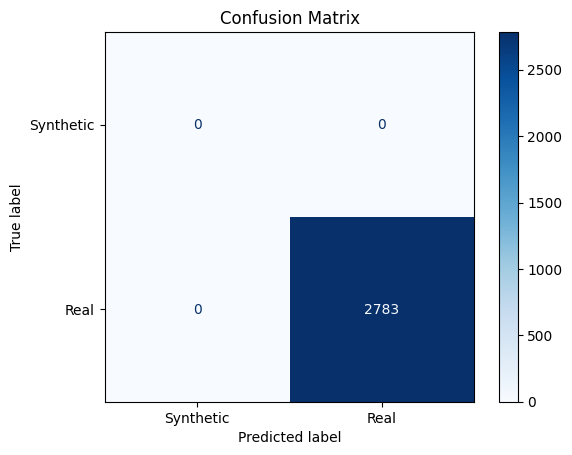

None


In [3]:
# Import RawNet1 components
from classes.models.RawNets.RawNet1.model_RawNet1_preprocessed_diff_pipeline import RawNet as RawNetv2

combined_model_config = {
    'in_channels': 1,
    'first_conv': 3,
    'filts': [128, [128, 128], [128, 256], [256, 256]],
    'blocks': [2, 4],
    'gru_node': 1024,
    'nb_gru_layer': 1,
    'nb_fc_node': 1024,
    'nb_classes': 2
}

# --- Set up model, optimizer, and scaler ---
model = RawNetv2(combined_model_config, device).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
scaler = GradScaler()

# --- Load the model ---
start_epoch = load_model_rawnet1(
    model, optimizer, scaler,
    path=r"pretrained_weights\diff_pipeline\RawNet1\rawnet1_diff_pipeline-ep_30-bs_32-lr_0.0001.pth"
)

for key, test_sample in combined_test_samples_dataloaders.items():
    print(f"Testing {key}")
    predictions = test_rawnet1_with_loaders(model, test_sample, device=device)
    print(predictions)

## RawNet2

Loaded model from pretrained_weights\diff_pipeline\RawNet2\rawnet2_diff_pipeline-ep_30-bs_32-lr_0.0001.pth (epoch 29)
Testing spoof elevenmultilingualv2 converted samples


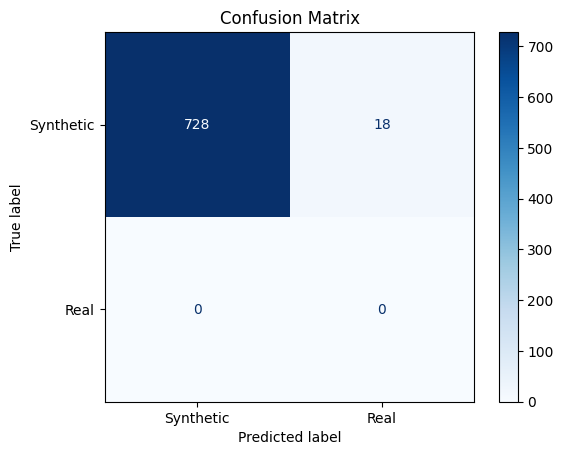

None
Testing spoof elevenmultilingualv2 tts samples


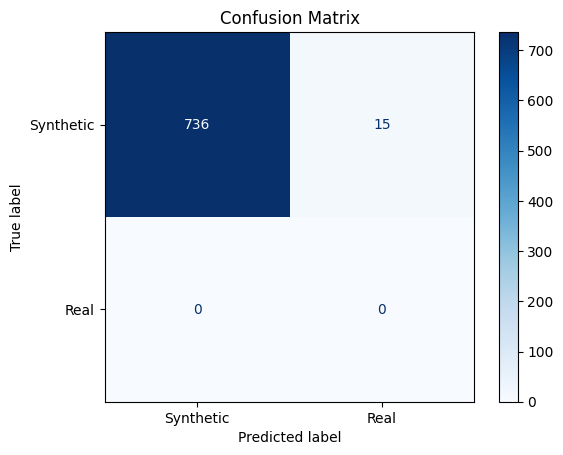

None
Testing spoof dupdub tts samples


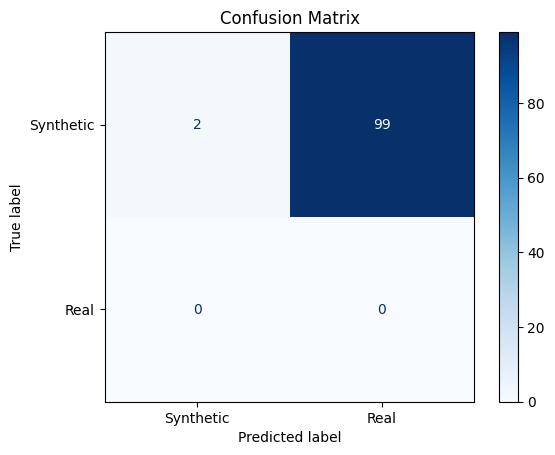

None
Testing spoof dupdub notindataset tts samples


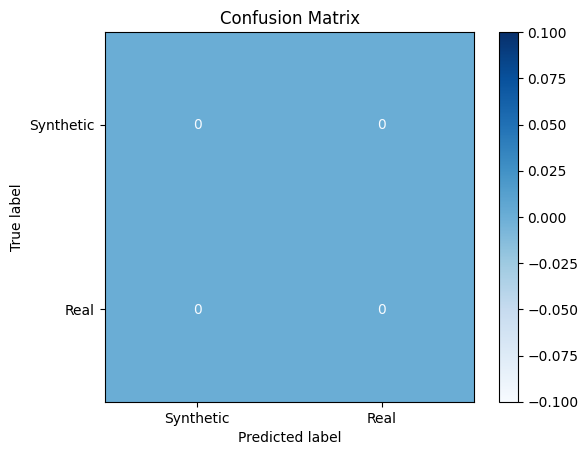

None
Testing spoof facebookmms converted samples


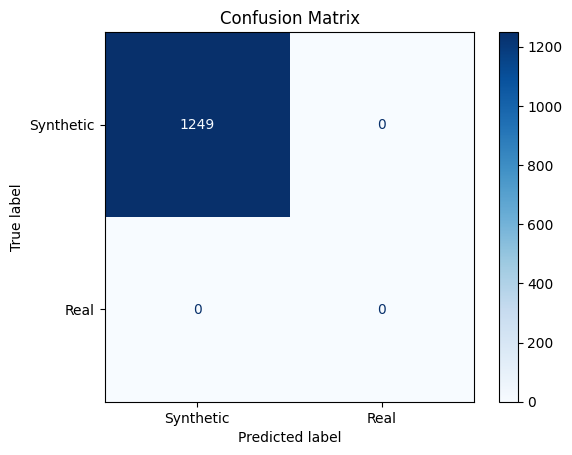

None
Testing spoof facebookmms tts samples


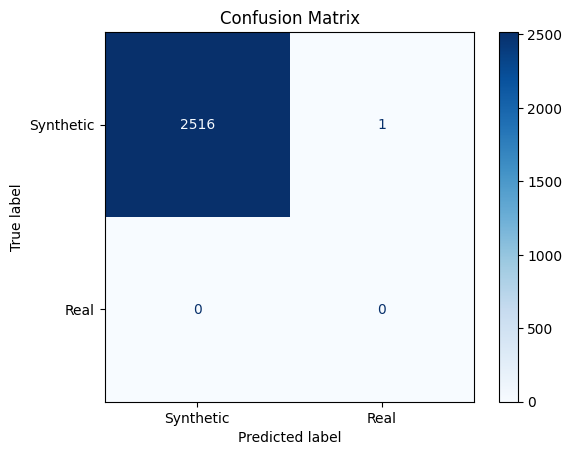

None
Testing spoof googletts converted samples


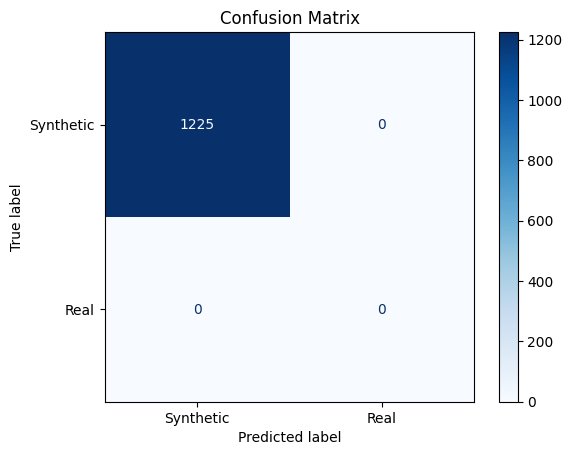

None
Testing spoof googletts tts samples


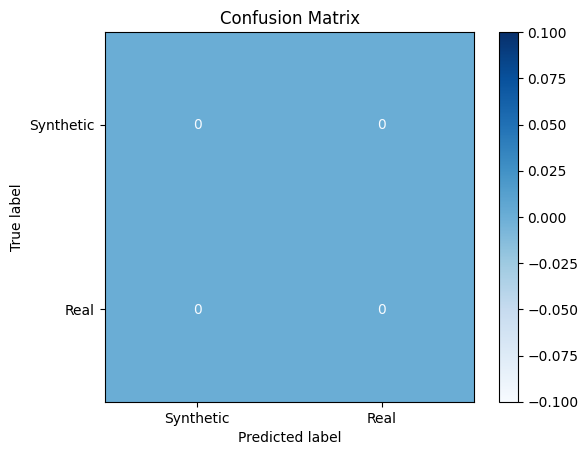

None
Testing spoof vits converted samples


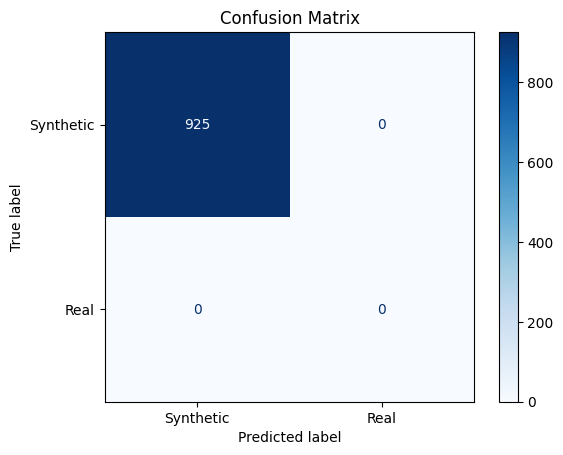

None
Testing spoof vits tts samples


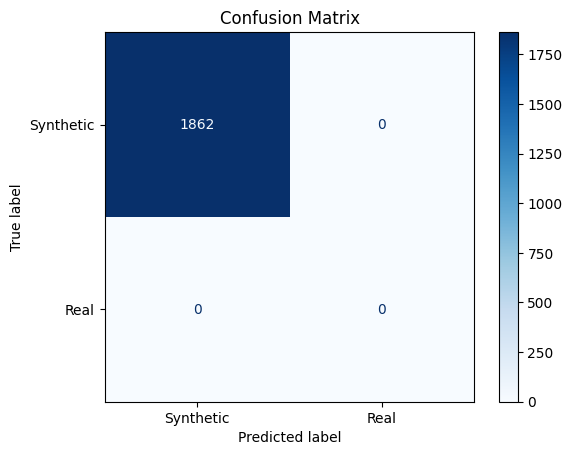

None
Testing bonafide commonvoice samples


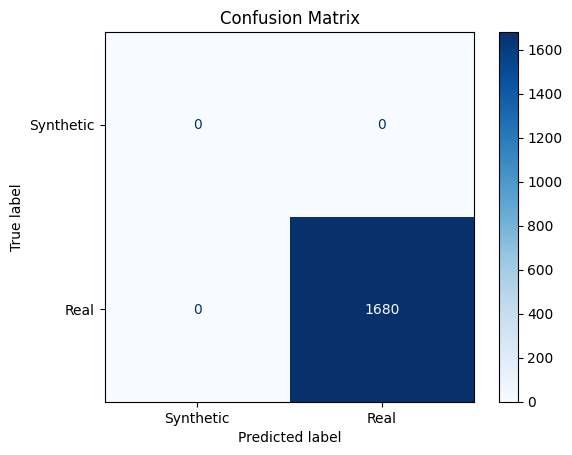

None
Testing bonafide prosa samples


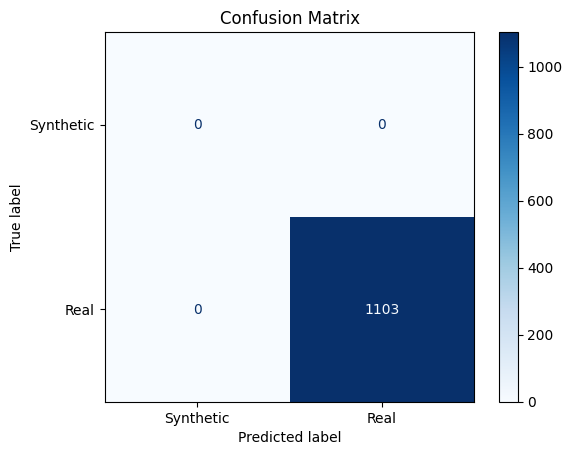

None
Testing spoof all samples


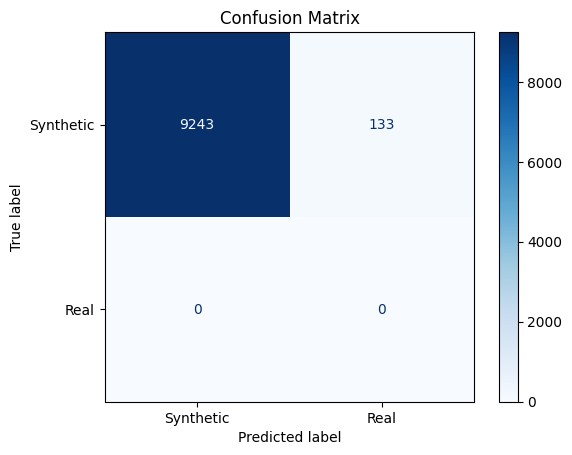

None
Testing bonafide all samples


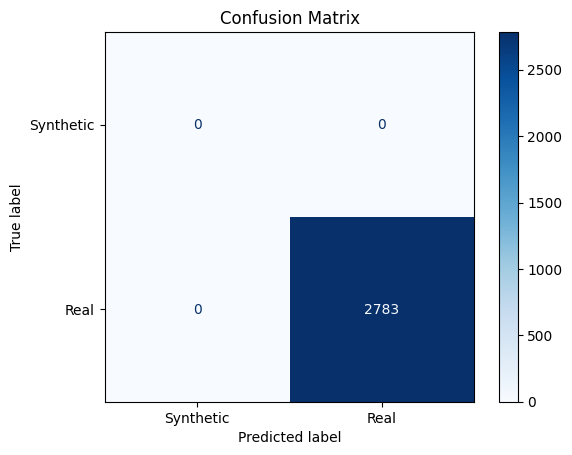

None


In [4]:
# Import RawNet2 components
from classes.models.RawNets.RawNet2.model_RawNet2_preprocessed_diff_pipeline import RawNet2 as RawNet2v2

combined_model_config2 = {
    'in_channels': 1,
    'first_conv': 3,
    'filts': [128, [128, 128], [128, 256], [256, 256]],
    'blocks': [2, 4],
    'gru_node': 1024,
    'nb_gru_layer': 1,
    'nb_fc_node': 1024,
    'nb_classes': 2,
    'nb_samp': 16000 * 4
}

device = "cuda" if torch.cuda.is_available() else "cpu"

# --- Set up model, optimizer, and scaler ---
model = RawNet2v2(combined_model_config2).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
scaler = GradScaler()

# --- Load the model ---
start_epoch = load_model_rawnet2(
    model, optimizer, scaler,
    path=r"pretrained_weights\diff_pipeline\RawNet2\rawnet2_diff_pipeline-ep_30-bs_32-lr_0.0001.pth"
)

for key, test_sample in combined_test_samples_dataloaders.items():
    print(f"Testing {key}")
    predictions = test_rawnet2_with_loaders(model, test_sample, device=device)
    print(predictions)

## RawNet3

In [5]:
combined_model_config3 = {
    "nOut": 2,
    "sinc_stride": 10,
    "encoder_type": "ECA",
    "log_sinc": True,
    "norm_sinc": "mean_std",
    "out_bn": True
}

# --- Set up model, optimizer, and scaler ---
model = RawNet3(**combined_model_config3).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
scaler = GradScaler()

# --- Load the model ---
start_epoch = load_model_rawnet3(
    model, optimizer, scaler,
    path=r"pretrained_weights\diff_pipeline\combined\RawNet3\rawnet3_combined-ep_30-bs_32-lr_0.0001.pth"
)

for key, test_sample in combined_test_samples_dataloaders.items():
    print(f"Testing {key}")
    predictions = test_rawnet3_with_loaders(model, test_sample, device=device)
    print(predictions)

FileNotFoundError: [Errno 2] No such file or directory: 'pretrained_weights\\diff_pipeline\\combined\\RawNet3\\rawnet3_combined-ep_30-bs_32-lr_0.0001.pth'

# Waveform

In [ ]:
# samples will be stored here:
waveform_test_samples = {
    "spoof elevenmultilingualv2 converted samples": [],
    "spoof elevenmultilingualv2 tts samples": [],
    "spoof dupdub tts samples": [],
    "spoof dupdub notindataset tts samples": [],
    "spoof facebookmms converted samples": [],
    "spoof facebookmms tts samples": [],
    "spoof googletts converted samples": [],
    "spoof googletts tts samples": [],
    "spoof vits converted samples": [],
    "spoof vits tts samples": [],
    "bonafide commonvoice samples": [],
    "bonafide prosa samples": [],

    "spoof all samples": [],
    "bonafide all samples": []
}

# unseen spoof datasets
waveform_spoof_elevenmultilingualv2_converted_dir = "test_preprocessed_data/waveform/Spoof/Converted/ElevenMultilingualV2"
waveform_spoof_elevenmultilingualv2_tts_dir = "test_preprocessed_data/waveform/Spoof/TTS/ElevenMultilingualV2"
waveform_spoof_dupdub_tts_dir = "test_preprocessed_data/waveform/Spoof/TTS/DupDub"
waveform_spoof_dupdub_notindataset_tts_dir = "test_preprocessed_data/waveform/Spoof/TTS/DupDub-NotInDataset"

# seen spoof datasets
waveform_spoof_facebookmms_converted_dir = "preprocessed_data/waveform/Spoof/Converted/FacebookMMS"
waveform_spoof_facebookmms_tts_dir = "preprocessed_data/waveform/Spoof/TTS/FacebookMMS"
waveform_spoof_googletts_converted_dir = "preprocessed_data/waveform/Spoof/Converted/GoogleTTS"
waveform_spoof_googletts_tts_dir = "preprocessed_data/waveform/Spoof/TTS/GoogleTTS"
waveform_spoof_vits_converted_dir = "preprocessed_data/waveform/Spoof/Converted/VITS"
waveform_spoof_vits_tts_dir = "preprocessed_data/waveform/Spoof/TTS/VITS"

# Bonafide datasets (split each, DataLoader per split, do not combine)
waveform_bonafide_commonvoice_dir = "preprocessed_data/waveform/Bonafide/CommonVoice"
waveform_bonafide_prosa_dir = "preprocessed_data/waveform/Bonafide/Prosa"

# ElevenMultilingualV2 Converted
if os.path.exists(waveform_spoof_elevenmultilingualv2_converted_dir):
    waveform_spoof_elevenmultilingualv2_converted_dataset = WaveformFeatureDataset(waveform_spoof_elevenmultilingualv2_converted_dir, force_label=0)
    waveform_spoof_elevenmultilingualv2_converted_list = ListDataset([(features, 0) for features, _ in waveform_spoof_elevenmultilingualv2_converted_dataset.samples])
    waveform_test_samples["spoof elevenmultilingualv2 converted samples"].extend(waveform_spoof_elevenmultilingualv2_converted_list)
    waveform_test_samples["spoof all samples"].extend(waveform_spoof_elevenmultilingualv2_converted_list)

    print(f"Loaded {len(waveform_spoof_elevenmultilingualv2_converted_list)} samples from {waveform_spoof_elevenmultilingualv2_converted_dir}")
else:
    print(f"Warning: Directory not found: {waveform_spoof_elevenmultilingualv2_converted_dir}")

# ElevenMultilingualV2 TTS
if os.path.exists(waveform_spoof_elevenmultilingualv2_tts_dir):
    waveform_spoof_elevenmultilingualv2_tts_dataset = WaveformFeatureDataset(waveform_spoof_elevenmultilingualv2_tts_dir, force_label=0)
    waveform_spoof_elevenmultilingualv2_tts_list = ListDataset([(features, 0) for features, _ in waveform_spoof_elevenmultilingualv2_tts_dataset.samples])
    waveform_test_samples["spoof elevenmultilingualv2 tts samples"].extend(waveform_spoof_elevenmultilingualv2_tts_list)
    waveform_test_samples["spoof all samples"].extend(waveform_spoof_elevenmultilingualv2_tts_list)

    print(f"Loaded {len(waveform_spoof_elevenmultilingualv2_tts_list)} samples from {waveform_spoof_elevenmultilingualv2_tts_dir}")
else:
    print(f"Warning: Directory not found: {waveform_spoof_elevenmultilingualv2_tts_dir}")

# DupDub TTS
if os.path.exists(waveform_spoof_dupdub_tts_dir):
    waveform_spoof_dupdub_tts_dataset = WaveformFeatureDataset(waveform_spoof_dupdub_tts_dir, force_label=0)
    waveform_spoof_dupdub_tts_list = ListDataset([(features, 0) for features, _ in waveform_spoof_dupdub_tts_dataset.samples])
    waveform_test_samples["spoof dupdub tts samples"].extend(waveform_spoof_dupdub_tts_list)
    waveform_test_samples["spoof all samples"].extend(waveform_spoof_dupdub_tts_list)

    print(f"Loaded {len(waveform_spoof_dupdub_tts_list)} samples from {waveform_spoof_dupdub_tts_dir}")
else:
    print(f"Warning: Directory not found: {waveform_spoof_dupdub_tts_dir}")

# FacebookMMS Converted
if os.path.exists(waveform_spoof_facebookmms_converted_dir):
    dataset_waveform_spoof_facebookmms_converted = WaveformFeatureDataset(waveform_spoof_facebookmms_converted_dir, force_label=0)
    waveform_spoof_facebookmms_converted = ListDataset([(features, 0) for features, _ in dataset_waveform_spoof_facebookmms_converted.samples])
    t_fmc, v_fmc, te_fmc = stratified_split(waveform_spoof_facebookmms_converted, splits=(0.7, 0.15, 0.15), seed=seed)

    waveform_spoof_facebookmms_converted_list = ListDataset([waveform_spoof_facebookmms_converted[i] for i in range(len(te_fmc))])
    waveform_test_samples["spoof facebookmms converted samples"].extend(waveform_spoof_facebookmms_converted_list)
    waveform_test_samples["spoof all samples"].extend(waveform_spoof_facebookmms_converted_list)

    print(f"Loaded {len(waveform_spoof_facebookmms_converted_list)} samples from {waveform_spoof_facebookmms_converted_dir}")
else:
    print(f"Warning: Directory not found: {waveform_spoof_facebookmms_converted_dir}")

# FacebookMMS TTS
if os.path.exists(waveform_spoof_facebookmms_tts_dir):
    dataset_waveform_spoof_facebookmms_tts = WaveformFeatureDataset(waveform_spoof_facebookmms_tts_dir, force_label=0)
    waveform_spoof_facebookmms_tts = ListDataset([(features, 0) for features, _ in dataset_waveform_spoof_facebookmms_tts.samples])
    t_fmt, v_fmt, te_fmt = stratified_split(waveform_spoof_facebookmms_tts, splits=(0.7, 0.15, 0.15), seed=seed)
    
    waveform_spoof_facebookmms_tts_list = ListDataset([waveform_spoof_facebookmms_tts[i] for i in range(len(te_fmt))])
    waveform_test_samples["spoof facebookmms tts samples"].extend(waveform_spoof_facebookmms_tts_list)
    waveform_test_samples["spoof all samples"].extend(waveform_spoof_facebookmms_tts_list)

    print(f"Loaded {len(waveform_spoof_facebookmms_tts_list)} samples from {waveform_spoof_facebookmms_tts_dir}")
else:
    print(f"Warning: Directory not found: {waveform_spoof_facebookmms_tts_dir}")

# GoogleTTS Converted
if os.path.exists(waveform_spoof_googletts_converted_dir):
    dataset_waveform_spoof_googletts_converted = WaveformFeatureDataset(waveform_spoof_googletts_converted_dir, force_label=0)
    waveform_spoof_googletts_converted = ListDataset([(features, 0) for features, _ in dataset_waveform_spoof_googletts_converted.samples])
    t_gtc, v_gtc, te_gtc = stratified_split(waveform_spoof_googletts_converted, splits=(0.7, 0.15, 0.15), seed=seed)

    waveform_spoof_googletts_converted_list = ListDataset([waveform_spoof_googletts_converted[i] for i in range(len(te_gtc))])
    waveform_test_samples["spoof googletts converted samples"].extend(waveform_spoof_googletts_converted_list)
    waveform_test_samples["spoof all samples"].extend(waveform_spoof_googletts_converted_list)

    print(f"Loaded {len(waveform_spoof_googletts_converted_list)} samples from {waveform_spoof_googletts_converted_dir}")
else:
    print(f"Warning: Directory not found: {waveform_spoof_googletts_converted_dir}")

# GoogleTTS TTS
if os.path.exists(waveform_spoof_googletts_tts_dir):
    dataset_waveform_spoof_googletts_tts = WaveformFeatureDataset(waveform_spoof_googletts_tts_dir, force_label=0)
    waveform_spoof_googletts_tts = ListDataset([(features, 0) for features, _ in dataset_waveform_spoof_googletts_tts.samples])
    t_gtt, v_gtt, te_gtt = stratified_split(waveform_spoof_googletts_tts, splits=(0.7, 0.15, 0.15), seed=seed)

    waveform_spoof_googletts_tts_list = ListDataset([waveform_spoof_googletts_tts[i] for i in range(len(te_gtt))])
    waveform_test_samples["spoof googletts tts samples"].extend(waveform_spoof_googletts_tts_list)
    waveform_test_samples["spoof all samples"].extend(waveform_spoof_googletts_tts_list)

    print(f"Loaded {len(waveform_spoof_googletts_tts_list)} samples from {waveform_spoof_googletts_tts_dir}")
else:
    print(f"Warning: Directory not found: {waveform_spoof_googletts_tts_dir}")

# VITS Converted
if os.path.exists(waveform_spoof_vits_converted_dir):
    dataset_waveform_spoof_vits_converted = WaveformFeatureDataset(waveform_spoof_vits_converted_dir, force_label=0)
    waveform_spoof_vits_converted = ListDataset([(features, 0) for features, _ in dataset_waveform_spoof_vits_converted.samples])
    t_vc, v_vc, te_vc = stratified_split(waveform_spoof_vits_converted, splits=(0.7, 0.15, 0.15), seed=seed)

    waveform_spoof_vits_converted_list = ListDataset([waveform_spoof_vits_converted[i] for i in range(len(te_vc))])
    waveform_test_samples["spoof vits converted samples"].extend(waveform_spoof_vits_converted_list)
    waveform_test_samples["spoof all samples"].extend(waveform_spoof_vits_converted_list)

    print(f"Loaded {len(waveform_spoof_vits_converted_list)} samples from {waveform_spoof_vits_converted_dir}")
else:
    print(f"Warning: Directory not found: {waveform_spoof_vits_converted_dir}")

# VITS TTS
if os.path.exists(waveform_spoof_vits_tts_dir):
    dataset_waveform_spoof_vits_tts = WaveformFeatureDataset(waveform_spoof_vits_tts_dir, force_label=0)
    waveform_spoof_vits_tts = ListDataset([(features, 0) for features, _ in dataset_waveform_spoof_vits_tts.samples])
    t_vt, v_vt, te_vt = stratified_split(waveform_spoof_vits_tts, splits=(0.7, 0.15, 0.15), seed=seed)

    waveform_spoof_vits_tts_list = ListDataset([waveform_spoof_vits_tts[i] for i in range(len(te_vt))])
    waveform_test_samples["spoof vits tts samples"].extend(waveform_spoof_vits_tts_list)
    waveform_test_samples["spoof all samples"].extend(waveform_spoof_vits_tts_list)

    print(f"Loaded {len(waveform_spoof_vits_tts_list)} samples from {waveform_spoof_vits_tts_dir}")
else:
    print(f"Warning: Directory not found: {waveform_spoof_vits_tts_dir}")

# Bonafide CommonVoice
if os.path.exists(waveform_bonafide_commonvoice_dir):
    dataset_commonvoice = WaveformFeatureDataset(waveform_bonafide_commonvoice_dir, force_label=1)
    waveform_bonafide_commonvoice = ListDataset([(features, 1) for features, _ in dataset_commonvoice.samples])
    t_c, v_c, te_c = stratified_split(waveform_bonafide_commonvoice, splits=(0.7, 0.15, 0.15), seed=seed)

    waveform_bonafide_commonvoice_list = ListDataset([waveform_bonafide_commonvoice[i] for i in range(len(te_c))])
    waveform_test_samples["bonafide commonvoice samples"].extend(waveform_bonafide_commonvoice_list)
    waveform_test_samples["bonafide all samples"].extend(waveform_bonafide_commonvoice_list)

    print(f"Loaded {len(waveform_bonafide_commonvoice_list)} samples from {waveform_bonafide_commonvoice_dir}")
else:
    print(f"Warning: Directory not found: {waveform_bonafide_commonvoice_dir}")

# Bonafide Prosa
if os.path.exists(waveform_bonafide_prosa_dir):
    dataset_prosa = WaveformFeatureDataset(waveform_bonafide_prosa_dir, force_label=1)
    waveform_bonafide_prosa = ListDataset([(features, 1) for features, _ in dataset_prosa.samples])
    t_p, v_p, te_p = stratified_split(waveform_bonafide_prosa, splits=(0.7, 0.15, 0.15), seed=seed)

    waveform_bonafide_prosa_list = ListDataset([waveform_bonafide_prosa[i] for i in range(len(te_p))])
    waveform_test_samples["bonafide prosa samples"].extend(waveform_bonafide_prosa_list)
    waveform_test_samples["bonafide all samples"].extend(waveform_bonafide_prosa_list)

    print(f"Loaded {len(waveform_bonafide_prosa_list)} samples from {waveform_bonafide_prosa_dir}")
else:
    print(f"Warning: Directory not found: {waveform_bonafide_prosa_dir}")

print(f"Total test spoof samples: {len(waveform_test_samples['spoof all samples'])}")
print(f"Total test bonafide samples: {len(waveform_test_samples['bonafide all samples'])}")

waveform_test_samples_dataloaders = {
    key: DataLoader(value, batch_size=batch_size, shuffle=False, num_workers=4)
    for key, value in waveform_test_samples.items()
}

==================== LOADING DATASET ====================

Skipped 0 files due to NaNs/Infs.
Total samples in test others dataset: 101
Test others dataset loaded with 101 samples.


## RawNet1

Loaded model from pretrained_weights\waveform\RawNet1\rawnet1_waveform-ep_100-bs_32-lr_0.0001.pth (epoch 99)


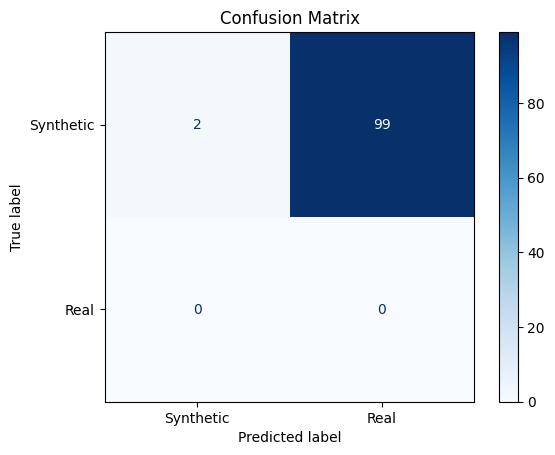

In [ ]:
waveform_model_config = {
    'in_channels': 1,
    'first_conv': 3,
    'filts': [128, [128, 128], [128, 256], [256, 256]],
    'blocks': [2, 4],
    'gru_node': 1024,
    'nb_gru_layer': 1,
    'nb_fc_node': 1024,
    'nb_classes': 2,
    'input_length': 16000 * 4
}

device = "cuda" if torch.cuda.is_available() else "cpu"

# --- Set up model, optimizer, and scaler ---
model = RawNet(waveform_model_config, device).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
scaler = GradScaler()

# --- Load the model ---
start_epoch = load_model_rawnet1(
    model, optimizer, scaler,
    path=r"pretrained_weights\waveform\RawNet1\rawnet1_waveform-ep_30-bs_32-lr_0.0001.pth"
)

for key, test_sample in waveform_test_samples_dataloaders.items():
    print(f"Testing {key}")
    predictions = test_rawnet1_with_loaders(model, test_sample, device=device)
    print(predictions)

## RawNet2

Loaded model from pretrained_weights\waveform\RawNet2\rawnet2_waveform-ep_100-bs_32-lr_0.0001.pth (epoch 99)


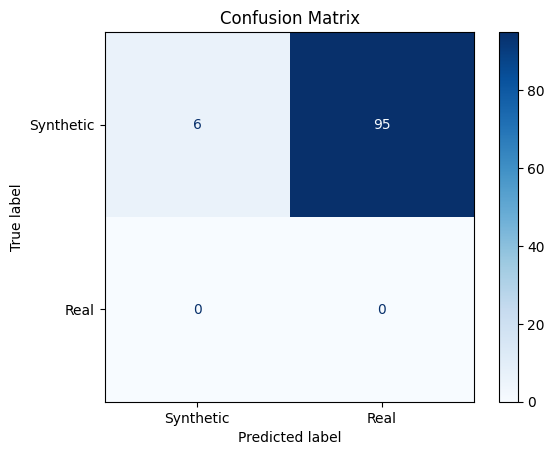

In [ ]:
waveform_model_config2 = {
    'in_channels': 1,
    'first_conv': 3,
    'filts': [128, [128, 128], [128, 256], [256, 256]],
    'blocks': [2, 4],
    'gru_node': 1024,
    'nb_gru_layer': 1,
    'nb_fc_node': 1024,
    'nb_classes': 2,
    'nb_samp': 16000 * 4
}

# --- Set up model, optimizer, and scaler ---
model = RawNet2(waveform_model_config2).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
scaler = GradScaler()

# --- Load the model ---
start_epoch = load_model_rawnet2(
    model, optimizer, scaler,
    path=r"pretrained_weights\waveform\RawNet2\rawnet2_waveform-ep_30-bs_32-lr_0.0001.pth"
)

for key, test_sample in waveform_test_samples_dataloaders.items():
    print(f"Testing {key}")
    predictions = test_rawnet2_with_loaders(model, test_sample, device=device)
    print(predictions)

## RawNet3

Loaded model from pretrained_weights\waveform\RawNet3\rawnet3_waveform-ep_23-bs_32-lr_0.0001.pth (epoch 22)


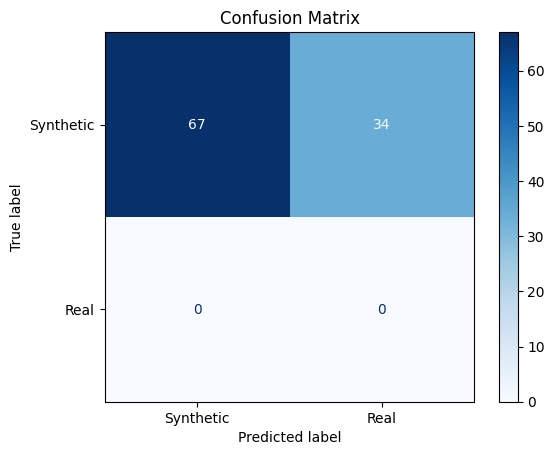

In [ ]:
waveform_model_config3 = {
    "nOut": 2,
    "sinc_stride": 10,
    "encoder_type": "ECA",
    "log_sinc": True,
    "norm_sinc": "mean_std",
    "out_bn": True
}

# --- Set up model, optimizer, and scaler ---
model = RawNet3(**waveform_model_config3).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
scaler = GradScaler()

# --- Load the model ---
start_epoch = load_model_rawnet3(
    model, optimizer, scaler,
    path=r"pretrained_weights\waveform\RawNet3\rawnet3_waveform-ep_30-bs_32-lr_0.0001.pth"
)

for key, test_sample in waveform_test_samples_dataloaders.items():
    print(f"Testing {key}")
    predictions = test_rawnet3_with_loaders(model, test_sample, device=device)
    print(predictions)